In [1]:
import pandas as pd
from prophet import Prophet

In [31]:
real_df = pd.read_csv('cap5.csv')
df = pd.read_csv('cap5.csv').head(163)
df.drop(["cycle","ambient_temperature"],inplace=True,axis = 1)

In [32]:
df.rename(columns = {'datetime':'ds',"capacity" : "y"}, inplace = True)

In [33]:
m = Prophet()
m.fit(df)

16:49:42 - cmdstanpy - INFO - Chain [1] start processing
16:49:42 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=5)

In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
163,2008-05-27 06:01:08,1.295184,1.278985,1.311271
164,2008-05-28 06:01:08,1.277856,1.260899,1.295301
165,2008-05-29 06:01:08,1.252338,1.232045,1.271932
166,2008-05-30 06:01:08,1.256462,1.232124,1.282425
167,2008-05-31 06:01:08,1.249061,1.217803,1.280539


In [36]:
import seaborn as sns
forecast.rename(columns = {"yhat" : "y"}, inplace = True)
real_df.rename(columns = {'datetime':'ds',"capacity" : "y"}, inplace = True)


In [37]:
real_df = real_df[["ds","y"]]
forecast = forecast[["ds","y"]]

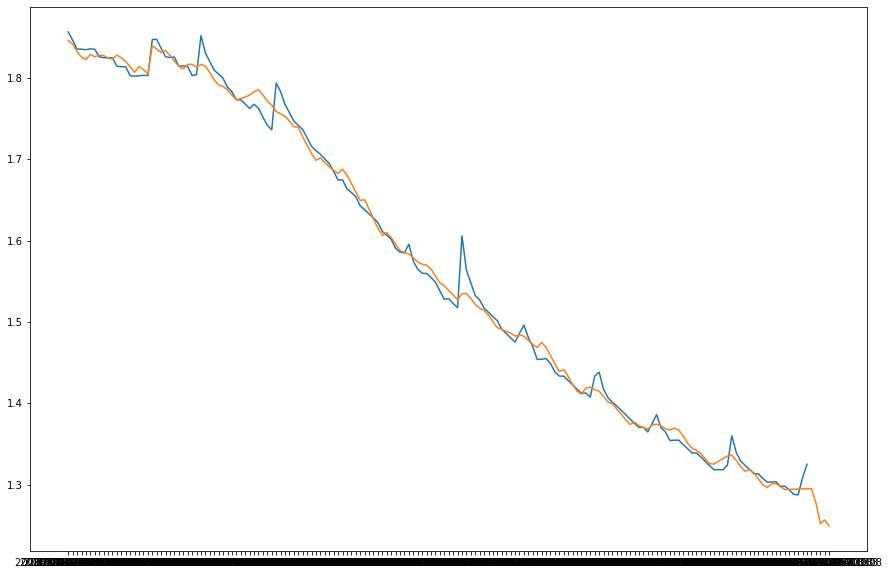

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(real_df["ds"],real_df["y"])
forecast["ds"] = forecast["ds"].astype(str)
plt.plot(forecast["ds"],forecast["y"])

In [50]:
for i in range(168):
    if real_df.iloc[i]["ds"] == forecast.iloc[i]["ds"] and (real_df.iloc[i]["y"] - forecast.iloc[i]["y"] > 0.05):
        print("index: " + str(i))

index: 89


In [59]:
bat_df = pd.read_csv('cap5.csv')
print(bat_df.iloc[85:92])

    cycle  ambient_temperature             datetime  capacity
85     86                   24  2008-05-07 12:01:49  1.527914
86     87                   24  2008-05-07 16:59:29  1.528525
87     88                   24  2008-05-07 21:56:09  1.522647
88     89                   24  2008-05-08 02:53:49  1.517486
89     90                   24  2008-05-09 12:25:07  1.605819
90     91                   24  2008-05-09 20:28:09  1.563849
91     92                   24  2008-05-10 01:21:56  1.548092
